# 比赛数据探查

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
train_df = pd.read_table('round1_ijcai_18_train_20180301.txt',sep=' ')
test_df = pd.read_table('round1_ijcai_18_test_a_20180301.txt',sep=' ')

In [149]:
train_df[train_df['shop_review_positive_rate'] == -1].describe()

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade,weekday,hour
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000,7.000000,7.0,7.000000,7.000000e+00,7.0,...,7.000000e+00,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.000000,7.000000
mean,3.403412e+18,2.839587e+18,6.330816e+18,5.009513e+18,5.714286,-0.285714,0.0,7.428571,5.675891e+18,0.0,...,5.426170e+18,0.0,-1.0,4999.0,-1.0,-1.0,-1.0,0.0,2.142857,13.285714
std,2.172489e+18,8.986559e+17,2.602034e+18,1.207039e+18,1.603567,1.253566,0.0,0.975900,2.342378e+18,0.0,...,2.626432e+18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.676163,9.411239
min,9.180339e+17,2.118953e+18,7.393828e+17,3.910416e+18,4.000000,-1.000000,0.0,6.000000,2.789891e+18,0.0,...,1.905230e+18,0.0,-1.0,4999.0,-1.0,-1.0,-1.0,0.0,0.000000,0.000000
25%,1.782287e+18,2.120643e+18,6.111596e+18,4.433348e+18,4.500000,-1.000000,0.0,7.000000,4.143827e+18,0.0,...,3.177536e+18,0.0,-1.0,4999.0,-1.0,-1.0,-1.0,0.0,1.000000,7.500000
50%,2.392765e+18,2.122332e+18,7.838285e+18,4.918413e+18,5.000000,-1.000000,0.0,8.000000,4.496964e+18,0.0,...,7.106980e+18,0.0,-1.0,4999.0,-1.0,-1.0,-1.0,0.0,2.000000,17.000000
75%,5.339496e+18,3.747290e+18,7.838285e+18,4.918413e+18,7.000000,0.000000,0.0,8.000000,7.636156e+18,0.0,...,7.430721e+18,0.0,-1.0,4999.0,-1.0,-1.0,-1.0,0.0,3.500000,19.000000
max,6.269521e+18,3.899960e+18,7.838285e+18,7.534239e+18,8.000000,2.000000,0.0,8.000000,8.884412e+18,0.0,...,7.754462e+18,0.0,-1.0,4999.0,-1.0,-1.0,-1.0,0.0,4.000000,23.000000


## id特征分布情况

#### 普通id特征
1. instance_id          样本编号，Long
2. item_id              广告商品编号，Long类型
3. user_id              用户的编号，Long类型
4. context_id           上下文信息的编号，Long类型
5. shop_id              店铺的编号，Long类型
6. item_brand_id        广告商品的品牌编号，Long类型
7. item_city_id         广告商品的城市编号，Long类型
8. user_occupation_id   用户的预测职业编号，Int类型
9. context_page_id      广告商品的展示页面编号，Int类型；取值从1开始，依次增加；在一次搜索的展示结果中第一屏的编号为1，第二屏的编号为2

#### 特殊镶嵌id特征
1. predict_category_property    根据查询词预测的类目属性列表，String类型
2. item_property_list           广告商品的属性列表，String类型
3. item_category_list           广告商品的的类目列表，String类型

*处理方法*:
- 直方图, id分布情况
- id计数

In [14]:
##########
# 特殊id处理
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

spec_id_list = ['predict_category_property', 'item_property_list', 'item_category_list']

def kv_split(row, count_set):
    if not row or len(row) < 1:
        return
    
    for kv in row.split(';'):
        k = kv.split(':')
        if k[0] not in count_set:
            count_set[k[0]] = 1
        else:
            count_set[k[0]] = count_set[k[0]] + 1
    return len(count_set)

dfs = []
cols = []
print('special id value counts:')
for i, col in enumerate(train_df[spec_id_list]):
    count_set = {}
    train_df[col].apply(lambda row: kv_split(row, count_set))
    print(col + ' value count: ' + str(len(count_set)))
    
    df = pd.Series(count_set).reset_index()
    df.columns = ['k', 'v']
    dfs.append(df)
    cols.append(col)

special id value counts:
predict_category_property value count: 1032
item_property_list value count: 61407
item_category_list value count: 16


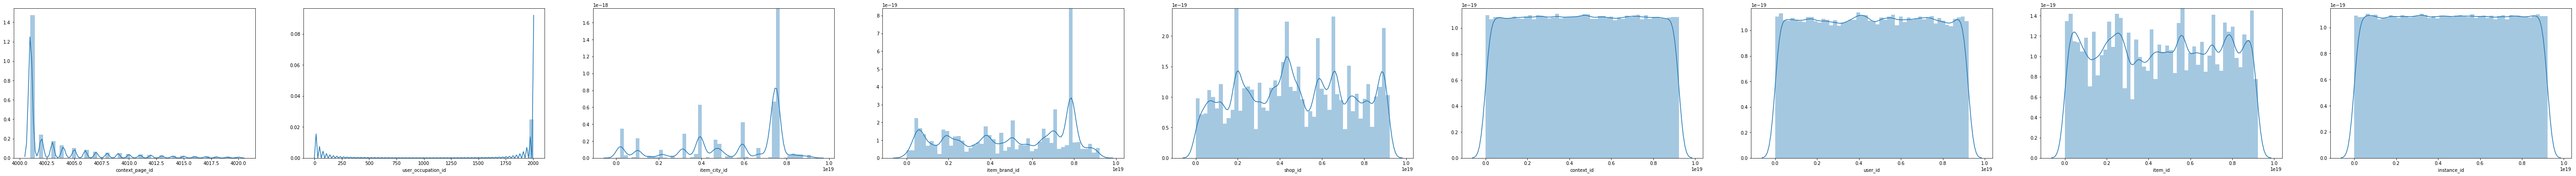

In [52]:
#############
# 查看id属性的直方图
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(1, 9, figsize=(100, 6))
sns.distplot(train_df['context_page_id'], ax=ax1)
sns.distplot(train_df['user_occupation_id'], ax=ax2)
sns.distplot(train_df['item_city_id'], ax=ax3)
sns.distplot(train_df['item_brand_id'], ax=ax4)
sns.distplot(train_df['shop_id'], ax=ax5)
sns.distplot(train_df['context_id'], ax=ax6)
sns.distplot(train_df['user_id'], ax=ax7)
sns.distplot(train_df['item_id'], ax=ax8)
sns.distplot(train_df['instance_id'], ax=ax9)

In [ ]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 6))
sns.distplot(train_df['item_price_level'], kde=False, ax=ax1)
sns.distplot(train_df['item_sales_level'], kde=False, ax=ax2)
sns.distplot(train_df['item_collected_level'], kde=False, ax=ax3)
sns.distplot(train_df['item_pv_level'], kde=False, ax=ax4)
sns.distplot(train_df['shop_review_num_level'], kde=False, ax=ax5)

In [151]:
###########
# 查看id属性的计数

id_list = ['item_price_level', 'item_collected_level', 'item_pv_level', 'shop_review_num_level', 'item_sales_level', 'context_page_id', 'item_city_id', 'item_brand_id', 'shop_id', 'context_id', 'user_id', 'item_id', 'instance_id']
for col in train_df[id_list]:
    count = train_df.agg({col: lambda x: x.nunique()}).values[0]
    print(col + ' value counts: ' + str(count))

item_price_level value counts: 14
item_sales_level value counts: 18
item_collected_level value counts: 18
item_pv_level value counts: 22
shop_review_num_level value counts: 25
item_sales_level value counts: 18
context_page_id value counts: 20
item_city_id value counts: 128
item_brand_id value counts: 2055
shop_id value counts: 3959
context_id value counts: 478111
user_id value counts: 197694
item_id value counts: 10075
instance_id value counts: 478087


## 数据相关性探查

In [25]:
##########
# 列举与目标值相关的单特征
train_df.corr()['is_trade']

instance_id                 -0.002158
item_id                     -0.000168
item_brand_id               -0.005311
item_city_id                -0.014622
item_price_level            -0.055895
item_sales_level             0.037358
item_collected_level         0.013972
item_pv_level                0.006077
user_id                      0.000255
user_gender_id               0.008843
user_age_level               0.002628
user_occupation_id           0.002026
user_star_level              0.002239
context_id                  -0.003459
context_timestamp           -0.009274
context_page_id             -0.012313
shop_id                     -0.003238
shop_review_num_level       -0.000747
shop_review_positive_rate   -0.017355
shop_star_level             -0.000735
shop_score_service          -0.015578
shop_score_delivery         -0.016239
shop_score_description      -0.016734
is_trade                     1.000000
Name: is_trade, dtype: float64

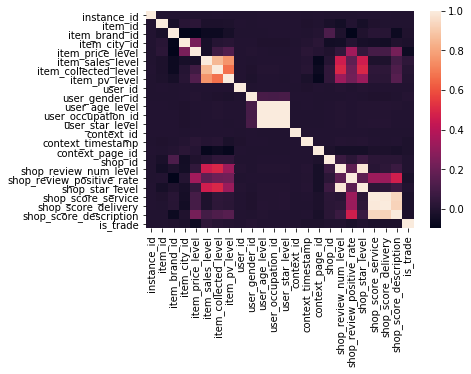

In [34]:
# 两两特征相关的热度图
corr = train_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## 连续特征探查

1. item_price_level           广告商品的价格等级，Int类型
2. item_sales_level           广告商品的销量等级，Int类型
3. item_collected_level       广告商品被收藏次数的等级，Int类型
4. item_pv_level              广告商品被展示次数的等级，Int类型
5. user_age_level             用户的预测年龄等级，Int类型
6. user_star_level            用户的星级编号，Int类型
7. shop_review_num_level      店铺的评价数量等级，Int类型
8. shop_review_positive_rate  店铺的好评率，Double类型
9. shop_star_level            店铺的星级编号，Int类型
10. shop_score_service        店铺的服务态度评分，Double类型
11. shop_score_delivery       店铺的物流服务评分，Double类型
12. shop_score_description    店铺的描述相符评分，Double类型

#### 分析方法
- 箱线图
- 分布图

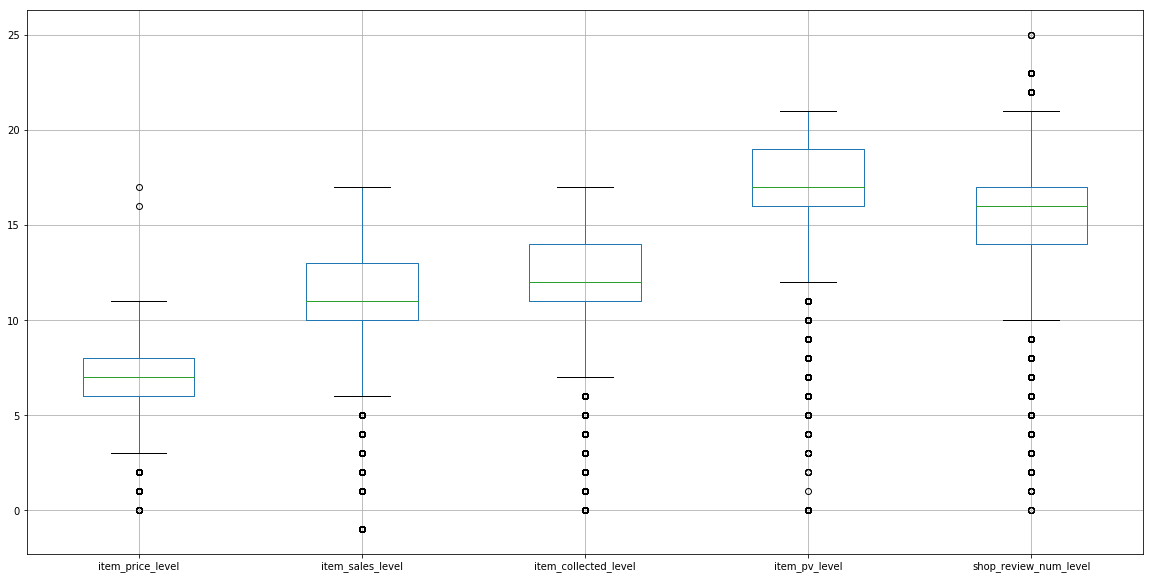

In [16]:
# level 数据箱线图,  level其实可以不算是连续型
ser_list1 = ['item_price_level', 'item_sales_level', 'item_collected_level', 'item_pv_level', 'shop_review_num_level']
train_df[ser_list1].boxplot(figsize=(20, 10))

#### int 分桶型分布

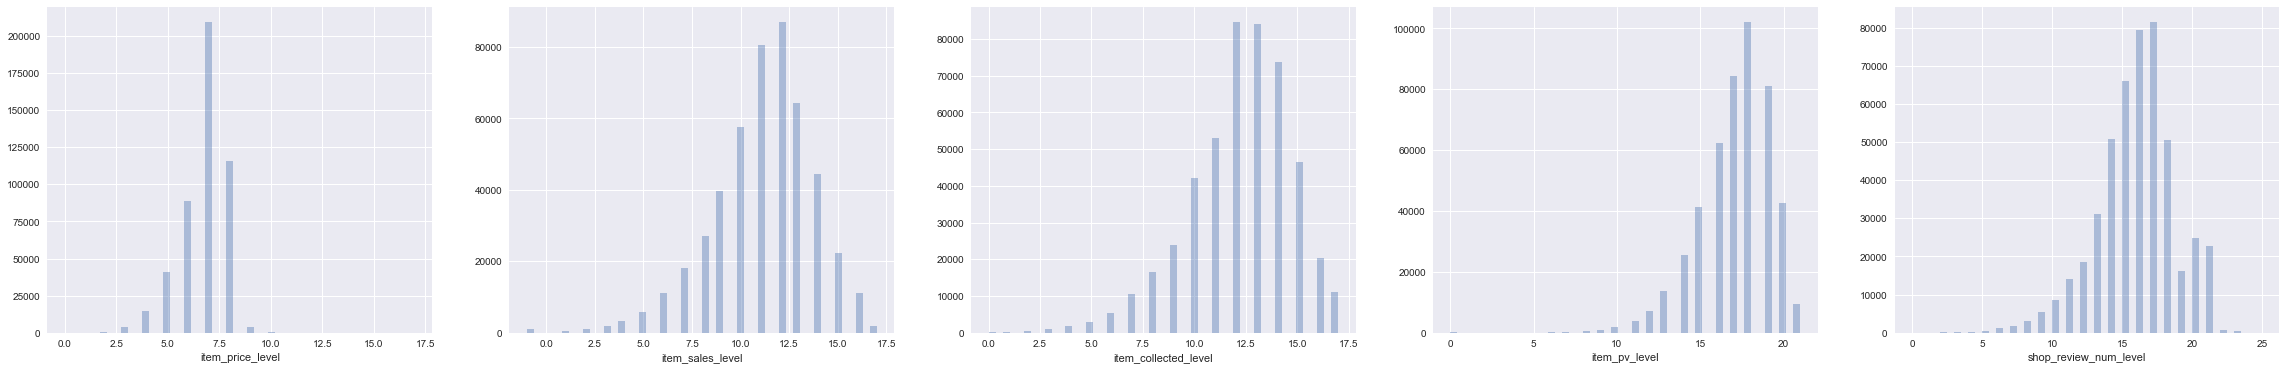

In [135]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 6))
sns.distplot(train_df['item_price_level'], kde=False, ax=ax1)
sns.distplot(train_df['item_sales_level'], kde=False, ax=ax2)
sns.distplot(train_df['item_collected_level'], kde=False, ax=ax3)
sns.distplot(train_df['item_pv_level'], kde=False, ax=ax4)
sns.distplot(train_df['shop_review_num_level'], kde=False, ax=ax5)

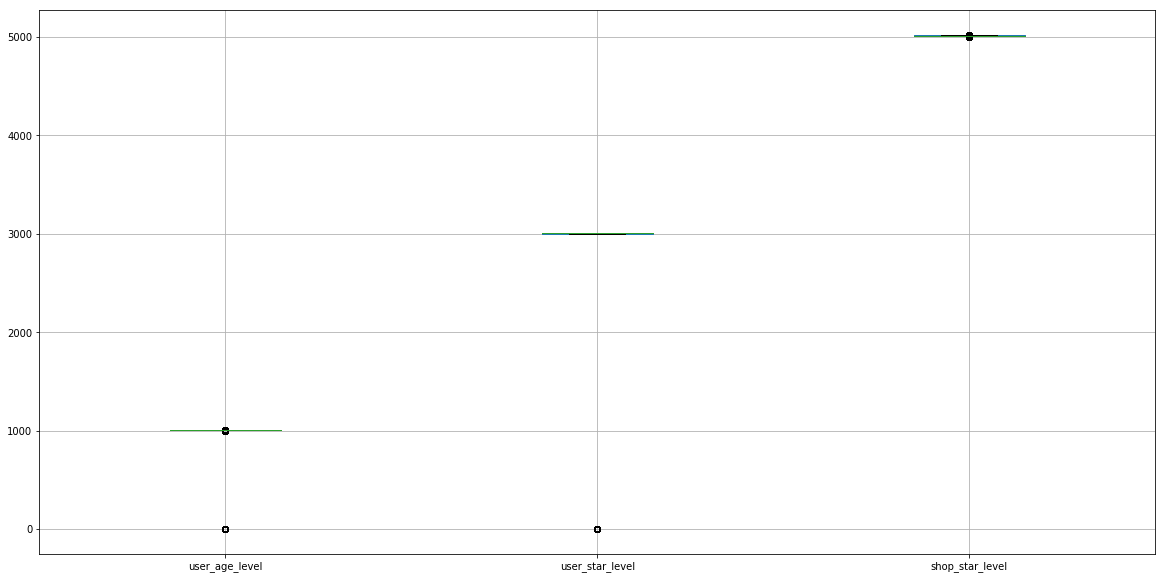

In [15]:
# 直接onehot即可
ser_list2 = ['user_age_level', 'user_star_level', 'shop_star_level']
train_df[ser_list2].boxplot(figsize=(20, 10))

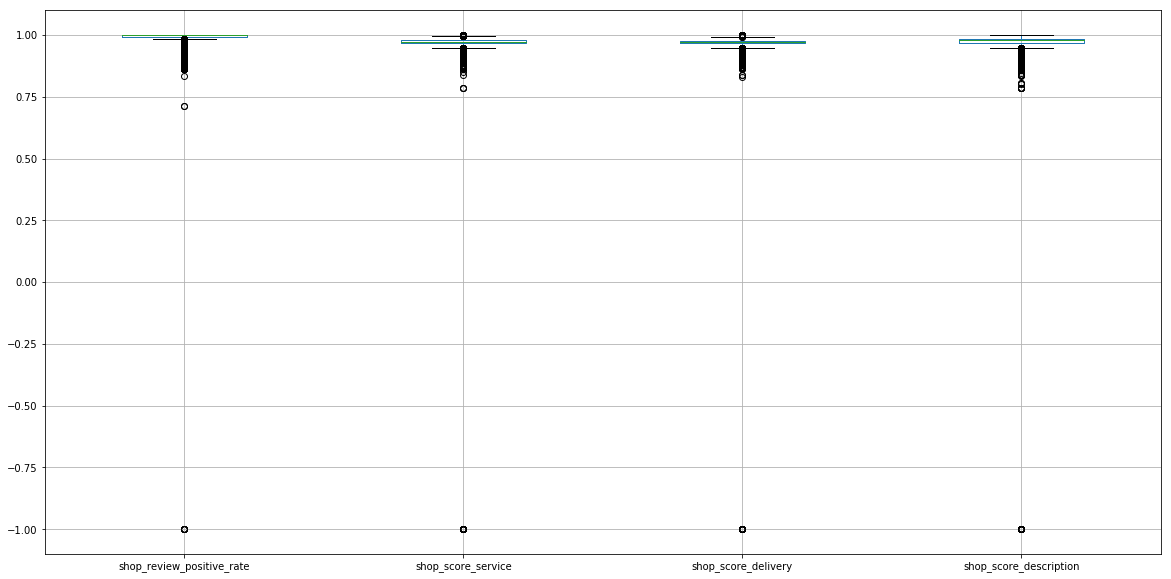

In [13]:
# 去掉异常值即可
ser3_list = ['shop_review_positive_rate', 'shop_score_service', 'shop_score_delivery', 'shop_score_description']
train_df[ser3_list].boxplot(figsize=(20,10))

#### Double型数据分布

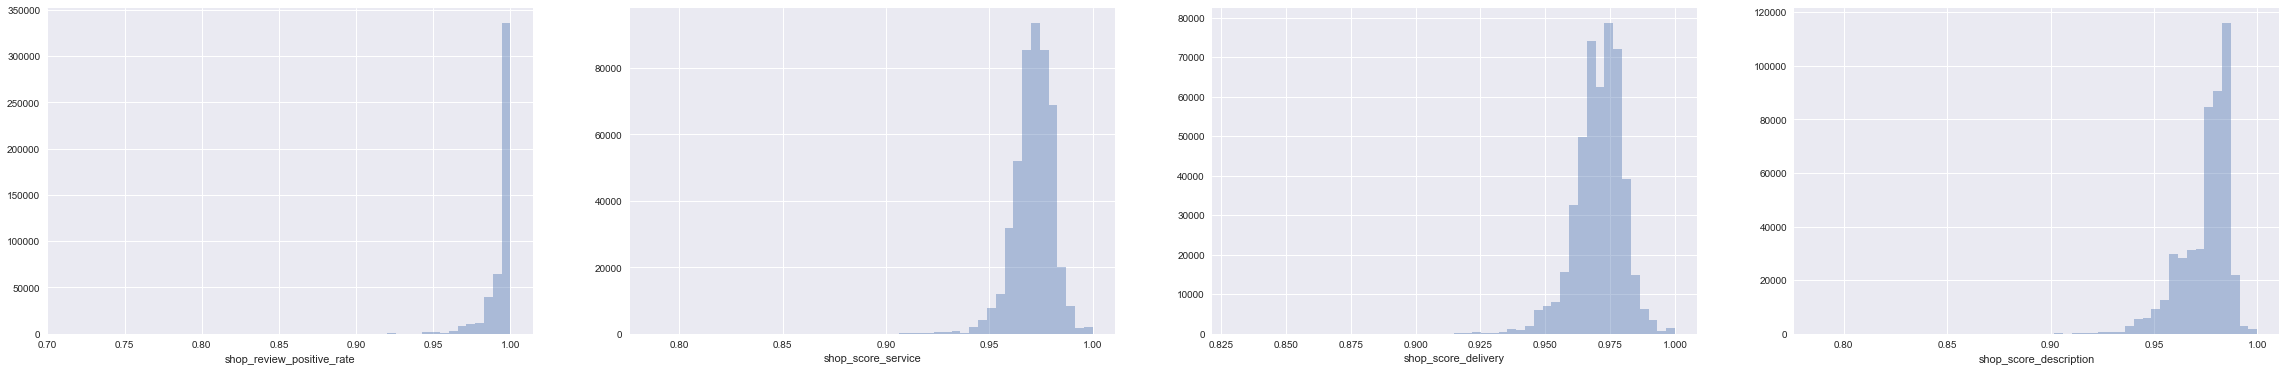

In [138]:
# 归一化
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(40, 6))
sns.distplot(train_df[train_df['shop_review_positive_rate']>0]['shop_review_positive_rate'], kde=False, ax=ax1)
sns.distplot(train_df[train_df['shop_score_service']>0]['shop_score_service'], kde=False, ax=ax2)
sns.distplot(train_df[train_df['shop_score_delivery']>0]['shop_score_delivery'], kde=False, ax=ax3)
sns.distplot(train_df[train_df['shop_score_description']>0]['shop_score_description'], kde=False, ax=ax4)

In [ ]:
train_df.describe()

## 时间序列id分析

#### 一, id每天新增 
1. user_id
2. item_id
...

分析每天新增的数据里, id的新增有多少

#### 二, 时间分布
1. 展示高峰时间
2. 购买高峰时间

In [9]:
# 时间处理: 分离天, 星期几, 上中下午/晚上, 小时数

from datetime import datetime

def extract_date(x):
    d = datetime.fromtimestamp(x)
    return d.strftime('%Y-%m-%d')
def extract_weekday(x):
    d = datetime.fromtimestamp(x)
    return d.weekday()
def extract_hour(x):
    d = datetime.fromtimestamp(x)
    return d.hour

train_df['date'] = train_df['context_timestamp'].apply(lambda x: extract_date(x))
train_df['weekday'] = train_df['context_timestamp'].apply(lambda x: extract_weekday(x))
train_df['hour'] = train_df['context_timestamp'].apply(lambda x: extract_hour(x))

In [6]:
##############################
# 物品每天投放数量以及每天新增数量
%run src/util/time_utils.py
import seaborn as sns
sns.set()

def printBarStack(left, right, left_tit, right_tit):
    import pandas as pd
    joined = pd.merge(left, right, on='date')
    joined.columns = ['date', left_tit, right_tit]
    joined.set_index('date').plot(kind='bar', stacked=True)

物品每天投放数量以及每天新增数量
物品每天投放数量以及每天新增数量(未交易情况)
物品每天投放数量以及每天新增数量(有交易情况)


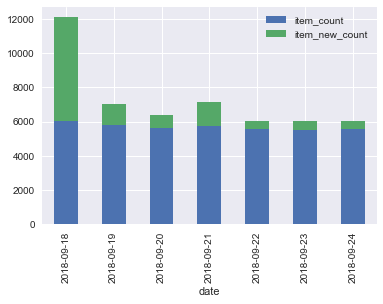

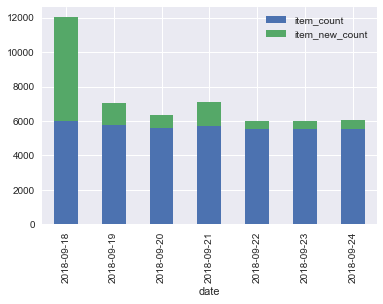

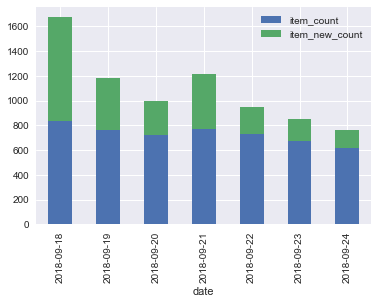

In [97]:
# 物品每天投放数量以及每天新增数量
item_id_acc = getColUvByDate(train_df, '2018-09-18', 'date', 'item_id', 7, True)
item_id_sin = getColUvByDate(train_df, '2018-09-18', 'date', 'item_id', 0, True)
printBarStack(item_id_sin, item_id_acc, 'item_count', 'item_new_count')

# 物品每天投放数量以及每天新增数量(未交易情况)
item_id_acc = getColUvByDate(train_df, '2018-09-18', 'date', 'item_id', 7, (train_df['is_trade'] == 0))
item_id_sin = getColUvByDate(train_df, '2018-09-18', 'date', 'item_id', 0, (train_df['is_trade'] == 0))
printBarStack(item_id_sin, item_id_acc, 'item_count', 'item_new_count')

# 物品每天投放数量以及每天新增数量(有交易情况)
item_id_acc = getColUvByDate(train_df, '2018-09-18', 'date', 'item_id', 7, (train_df['is_trade'] == 1))
item_id_sin = getColUvByDate(train_df, '2018-09-18', 'date', 'item_id', 0, (train_df['is_trade'] == 1))
printBarStack(item_id_sin, item_id_acc, 'item_count', 'item_new_count')

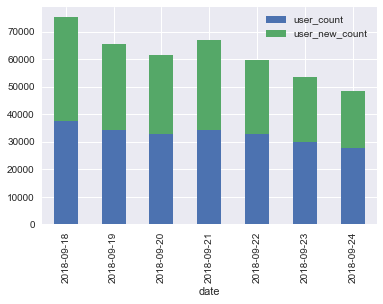

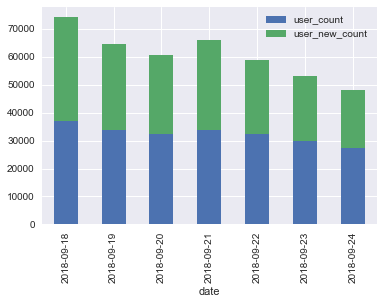

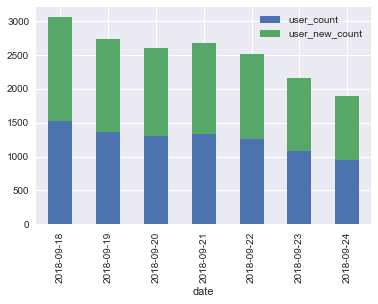

In [99]:
################################
# 用户每天个数以及每天新增数量


user_id_acc = getColUvByDate(train_df, '2018-09-18', 'date', 'user_id', 7, True)
user_id_sin = getColUvByDate(train_df, '2018-09-18', 'date', 'user_id', 0, True)
printBarStack(user_id_sin, user_id_acc, 'user_count', 'user_new_count')

# 未交易
user_id_acc1 = getColUvByDate(train_df, '2018-09-18', 'date', 'user_id', 7, (train_df['is_trade'] == 0))
user_id_sin1 = getColUvByDate(train_df, '2018-09-18', 'date', 'user_id', 0, (train_df['is_trade'] == 0))
printBarStack(user_id_sin1, user_id_acc1, 'user_count', 'user_new_count')

# 已交易
user_id_acc2 = getColUvByDate(train_df, '2018-09-18', 'date', 'user_id', 7, (train_df['is_trade'] == 1))
user_id_sin2 = getColUvByDate(train_df, '2018-09-18', 'date', 'user_id', 0, (train_df['is_trade'] == 1))
printBarStack(user_id_sin2, user_id_acc2, 'user_count', 'user_new_count')

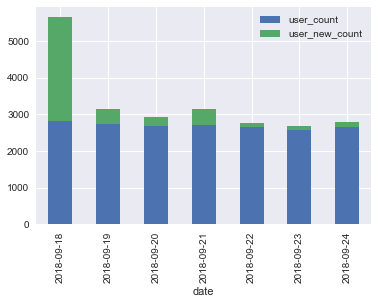

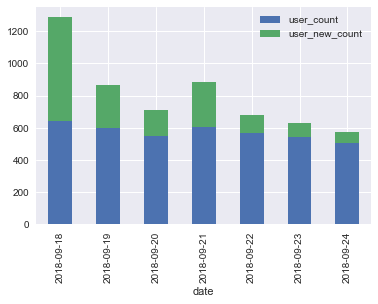

In [115]:
# 商店新增数量
user_id_acc2 = getColUvByDate(train_df, '2018-09-18', 'date', 'shop_id', 7, (train_df['is_trade'] == 0))
user_id_sin2 = getColUvByDate(train_df, '2018-09-18', 'date', 'shop_id', 0, (train_df['is_trade'] == 0))
printBarStack(user_id_sin2, user_id_acc2, 'user_count', 'user_new_count')

user_id_acc2 = getColUvByDate(train_df, '2018-09-18', 'date', 'shop_id', 7, (train_df['is_trade'] == 1))
user_id_sin2 = getColUvByDate(train_df, '2018-09-18', 'date', 'shop_id', 0, (train_df['is_trade'] == 1))
printBarStack(user_id_sin2, user_id_acc2, 'user_count', 'user_new_count')

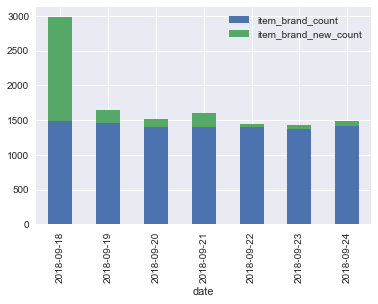

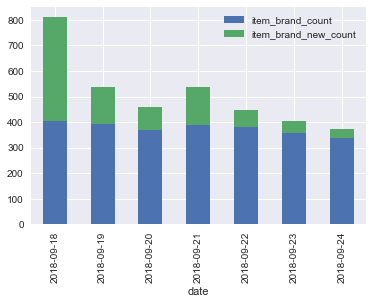

In [10]:
# brand新增数量
id_acc1 = getColUvByDate(train_df, '2018-09-18', 'date', 'item_brand_id', 7, (train_df['is_trade'] == 0))
id_sin1 = getColUvByDate(train_df, '2018-09-18', 'date', 'item_brand_id', 0, (train_df['is_trade'] == 0))
printBarStack(id_sin1, id_acc1, 'item_brand_count', 'item_brand_new_count')

id_acc2 = getColUvByDate(train_df, '2018-09-18', 'date', 'item_brand_id', 7, (train_df['is_trade'] == 1))
id_sin2 = getColUvByDate(train_df, '2018-09-18', 'date', 'item_brand_id', 0, (train_df['is_trade'] == 1))
printBarStack(id_sin2, id_acc2, 'item_brand_count', 'item_brand_new_count')

In [152]:
a= getColUvByDate(train_df, '2018-09-18', 'date', 'instance_id', 0)

In [153]:
a

,date,uv
0,2018-09-18,78261
1,2018-09-19,70927
2,2018-09-20,68382
3,2018-09-21,71194
4,2018-09-22,68313
5,2018-09-23,63611
6,2018-09-24,57416


In [158]:
train_df[:78261]['date']

0        2018-09-18
1        2018-09-18
2        2018-09-18
3        2018-09-18
4        2018-09-18
5        2018-09-18
6        2018-09-18
7        2018-09-18
8        2018-09-18
9        2018-09-18
10       2018-09-18
11       2018-09-18
12       2018-09-18
13       2018-09-18
14       2018-09-18
15       2018-09-18
16       2018-09-18
17       2018-09-18
18       2018-09-18
19       2018-09-18
20       2018-09-18
21       2018-09-18
22       2018-09-18
23       2018-09-18
24       2018-09-18
25       2018-09-18
26       2018-09-18
27       2018-09-18
28       2018-09-18
29       2018-09-18
            ...    
78231    2018-09-18
78232    2018-09-18
78233    2018-09-18
78234    2018-09-18
78235    2018-09-18
78236    2018-09-18
78237    2018-09-18
78238    2018-09-18
78239    2018-09-18
78240    2018-09-18
78241    2018-09-18
78242    2018-09-18
78243    2018-09-18
78244    2018-09-18
78245    2018-09-18
78246    2018-09-18
78247    2018-09-18
78248    2018-09-18
78249    2018-09-18
